<a href="https://colab.research.google.com/github/JasmineBW/Simple-Digit_Classifier_using_ML_Libraries/blob/main/hw2_q3_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST Visualizations

1. draw digits
2. pca before and after, draw digits
3. t-sne
4. 2-d pca

### Step 1: Download dataset
Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). In this experiment, we'll only be using the test set.

In [ ]:
import tensorflow as tf
import numpy as np

(xs_train, ys_train), (xs_test, ys_test) = tf.keras.datasets.mnist.load_data()

# We'll only be using the test set.
xs = xs_test.reshape((xs_test.shape[0], -1))
ys = ys_test

print(f"xs shape: {xs.shape}")
print(f"ys shape: {ys.shape}")

11490434/11490434 [==============================] - 0s 0us/step
xs shape: (10000, 784)
ys shape: (10000,)


### Step 2: Visualize digits

Each hand-written MNIST digit is a 28x28 matrix. For each digit (0, 1, 2, ..., 9), pick one sample to visualize.

(10000, 28, 28)


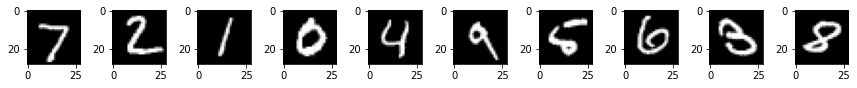

In [ ]:
import matplotlib.pyplot as plt
digits=[]
digit_indexes=[]


def visualize(x_set, y_set):
  plt.figure(figsize=(12,12))
  images = x_set.reshape(x_set.shape[0], 28, 28)
  print(images.shape)
  for j in range(10):
      plt.subplot(1,10,j+1)
      plt.imshow(images[digit_indexes[j]], cmap="gray")
  plt.tight_layout()

i=0

while i<100 and len(digits)!=10:
  if ys[i] not in digits:
    digits.append(ys[i])
    digit_indexes.append(i)
  i+=1

visualize(xs,ys)


### Step 3: PCA projection and recovery (5 Points)

The original dataset has 28x28=784 feature dimensions.

1. Use PCA to reduce the feature dimensions to [400, 200, 100, 50], respectively.
2. From the reduced dimension data, reproject the data back to 784 dimensions. Plot the results of the reprojected digits. For each PCA dimension, you should plot digits from 0-9, similar to step 2.

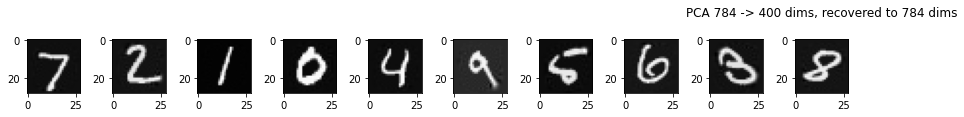

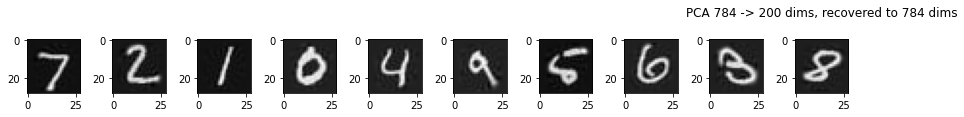

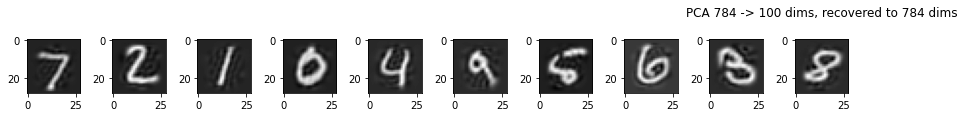

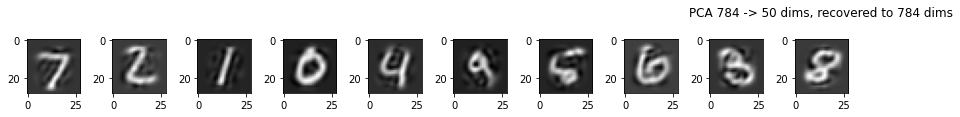

In [ ]:
from sklearn.decomposition import PCA

dimensions=[400,200,100,50]
for d in dimensions:
  pca = PCA(n_components=d)
  xs_reduced = pca.fit_transform(xs)
  xs_recovered=pca.inverse_transform(xs_reduced)
  #print("PCA 784 -> {} dims, recovered to 784 dims" .format(d))
  visualize(xs_recovered,ys)
  plt.title("PCA 784 -> {} dims, recovered to 784 dims\n" .format(d), pad=8)


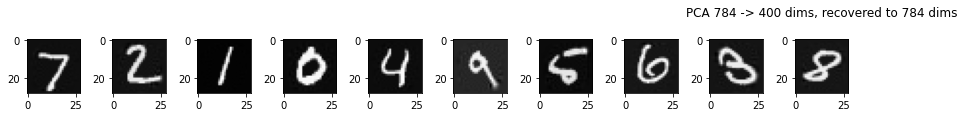

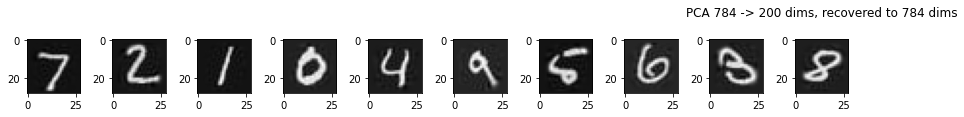

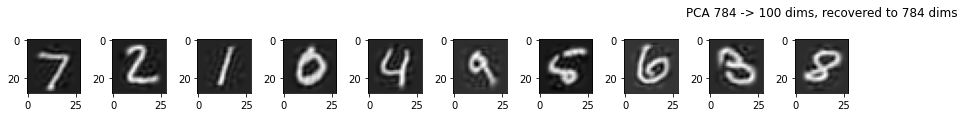

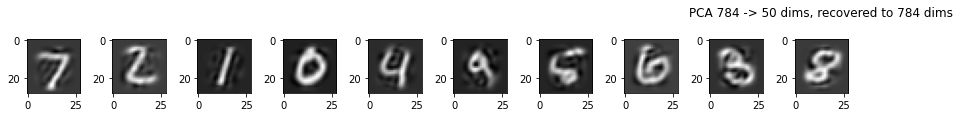

In [ ]:
from sklearn.decomposition import PCA

dimensions=[400,200,100,50]
for d in dimensions:
  pca = PCA(n_components=d)
  xs_reduced = pca.fit_transform(xs)
  xs_recovered=pca.inverse_transform(xs_reduced)
  #print("PCA 784 -> {} dims, recovered to 784 dims" .format(d))
  visualize(xs_recovered,ys)
  plt.title("PCA 784 -> {} dims, recovered to 784 dims\n" .format(d), pad=8)


### Step 4: t-SNE visualization (5 Points)

Use t-SNE to reduce the MNIST dataset down to 2 dimensions and plot the result using Matplotlib. You should clearly see clusters of the digits from the visualization.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


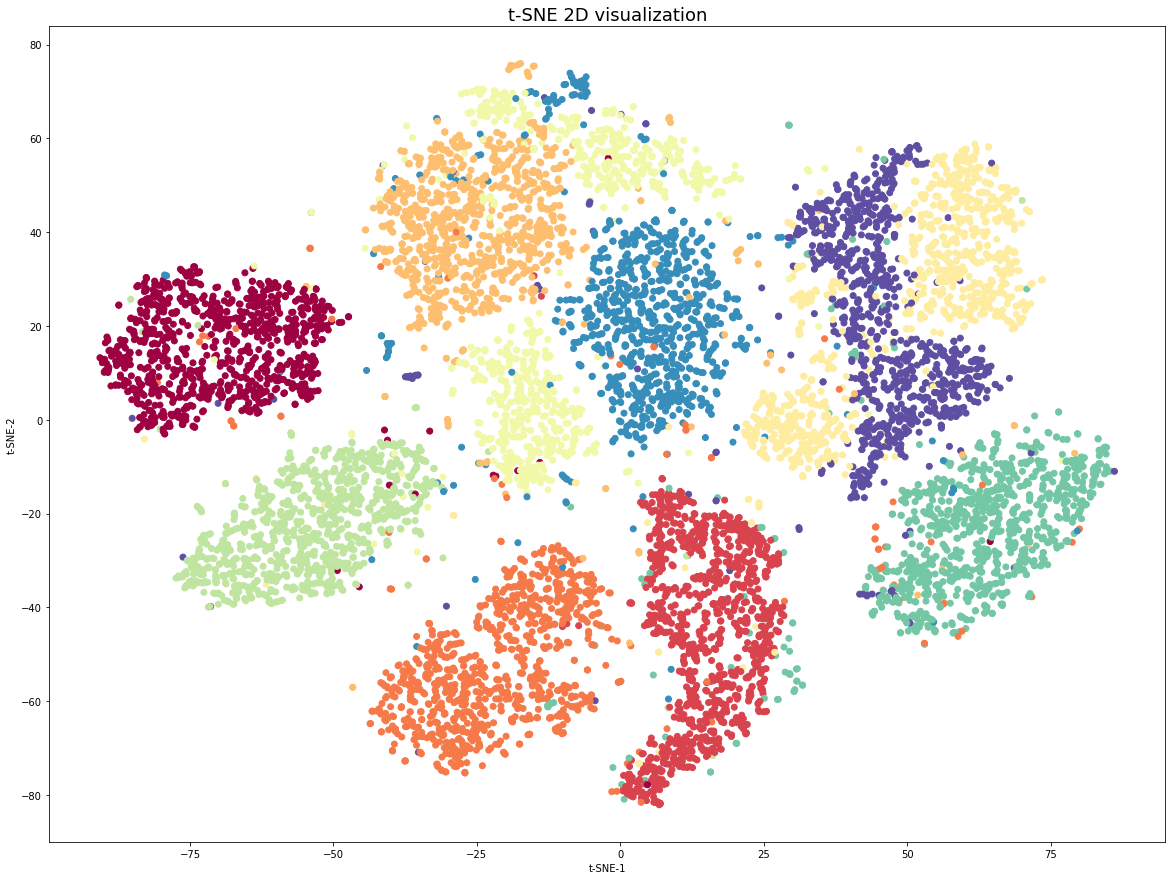

In [ ]:
from sklearn.manifold import TSNE
tSNE_visual = TSNE(n_components=2).fit_transform(xs)
plt.figure(figsize=(20,15))
plt.scatter(tSNE_visual[:,0], tSNE_visual[:,1], c=ys, cmap='Spectral')
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')
plt.title('t-SNE 2D visualization', fontsize=18);

### Step 5: PCA visualization (5 Points)

Next, let's use PCA to project the data to 2 dimension. Visualize the 2D data again. Which one performs better, t-SNE or PCA?

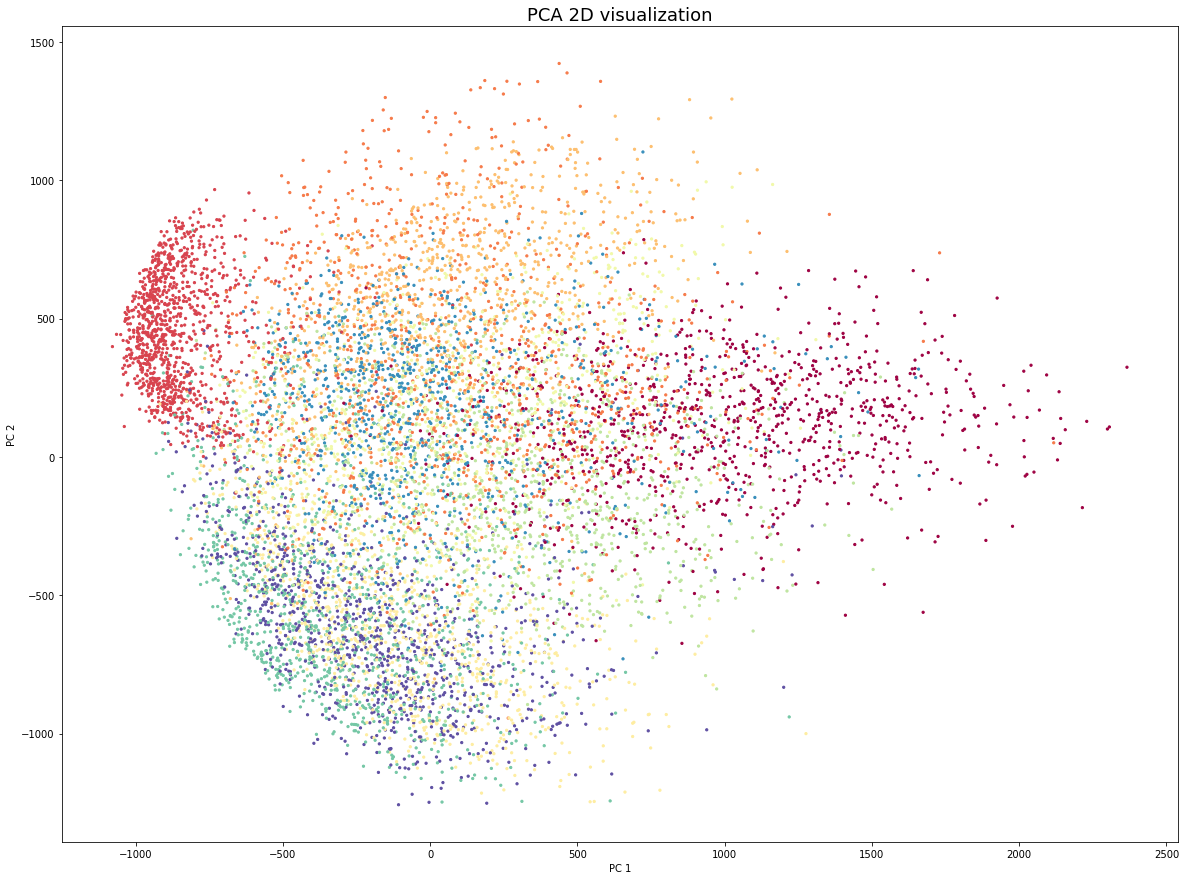

In [ ]:
pca = PCA(n_components=2)
xs_reduced = pca.fit_transform(xs)
plt.figure(figsize=(20,15))
plt.scatter(xs_reduced[:,0], xs_reduced[:,1], c=ys, s=5, cmap='Spectral')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA 2D visualization', fontsize=18);

Comparing dimension reduction methods, t-SNE does a better job than PCA does at seperating the data into clearly seperable categories.